# Telco Customer Churn Prediction
#### Customer churn is a significant issue for big business companies. Companies are attempting to create methods for predicting customer churn to get a direct impact on getting more revenues, particularly in telecom companies. Finding these characteristics is crucial to ensure appropriate steps can be taken to reduce customer churn.

In this Project, we will make machine learning models to predict customers who churn and not churn. We will analyze three characteristics:-
- services that the customer signed up for,
- account information about the customer, and 
- demographic info
  
We use two machine learning models, K-Nearest Neighbors and Logistic Regression. Then we will evaluate the model using some evaluation metrics.

### About Dataset
This data set contains nineteen columns (independent variables) and one column (dependent variable) as a target feature for predicting. First, we import some packages in use in this case for data visualization and classification problem

### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 20)

Dataset Contains 7043 rows and 20 Columns, we can check for Unique Values from each column in the data.

In [4]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

## Data Understanding
### classification Label
- Churn : Whether the customer churned or not (Yes or No)
### Services Each Customer Has to Sign Up
- PhoneServices : Whether the customer has a phone service or not (Yes or No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No Phone Service)
- InternetService : A type of internet service the customer has (DSL,Fiber Optic, No)
- OnlineSecurity : Whether the customer has Online security or not (Yes,No,No Internet Service)
- OnlineBackup : Whether the customer has Online Backup or not (Yes,No,No Internet Service)
- DeviceProtection : Whether the Customer has device protection or not (Yes,No,No Internet Service)
- TechSupport : Whether the Customer has tech support or not (Yes,No,No Internet Service)
- StreamingTV : Whether the Customer has Streaming TV (Yes,No,No Internet Service)
- StreamingMovies : Whether the Customer has Streaming Movies (Yes,No,No Internet Service)
### Customer Account Information
- Tenure : How long customer has stayed in the company
- Contract : The type of contract the customer has (Month-to-Month, One year, Two years)
- PaperlessBilling : Whether the customer has a paperless billing (Yes, No)
- PaymentMethod : payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : Amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
### Customer Demographic Info
- CustomerID : Unique value for each customer
- gender : The type of gender each customer (Female, Male)
- SeniorCitizen : Whether the customer is a senior citizen (Yes, No)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has a dependent or not (Yes, No)

## Data Overview

In [5]:
# Statistics Descriptives
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The Conclusion we can take from this:
- SeniorCitizen must be categorical data because minimum value is 0 and the maximum value is 1.
- The average customer stayed in the company is 32 months and 75% of customer has a tenure of 55 month
- Average monthly charges are USD 64.76 and 75% of customers pay more than USD 89.85

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

 - TotalCharges column it must be float not object so we will change it to float

In [7]:
# change TotalCharges to Float
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"],errors="coerce")

 - Payment Method check

In [8]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [9]:
# Remove Automatic Word from PaymentMethod
df['PaymentMethod'] = df['PaymentMethod'].str.replace(" (automatic)","",regex=False)

In [10]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

- Check for missing values

In [12]:
features_na = [feature for feature in df.columns if df [feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(),4)} % Missing Values")

TotalCharges, 0.0016 % Missing Values


In [13]:
#checking for missing values
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [14]:
#Droping missing values
df.dropna(inplace=True)

In [15]:
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


## Target Varibale Visualization

In [16]:
# Apply the ggplot style
plt.style.use("ggplot")

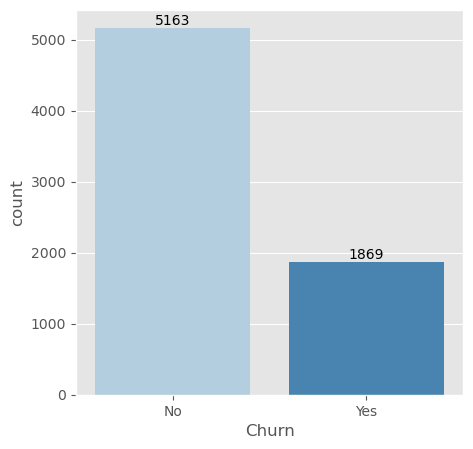

In [17]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Churn'],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

##### The following bar plot shows the target variable of churn yes and no. The proportion of churn is an imbalanced data set because both classes are not equally distributed. To handle it, resampling would be a suitable approach. To keep this simple, we will keep the imbalanced data set and uses many evaluation matrices to evaluate models.

### Analysis Services Each Customer

In [18]:
# make a function to plot Categorical data according to target
def plot_categorical_to_target(df,categorical_values,target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)

    fig = plt.figure(figsize = (12, 5*number_of_rows))

    for index, column in enumerate(categorical_values,1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x=column,data = df,hue=target,palette="Blues")
        ax.set_title(column)
    return plt.show()

#### We will evaluate a percentage target for each customer services column (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)

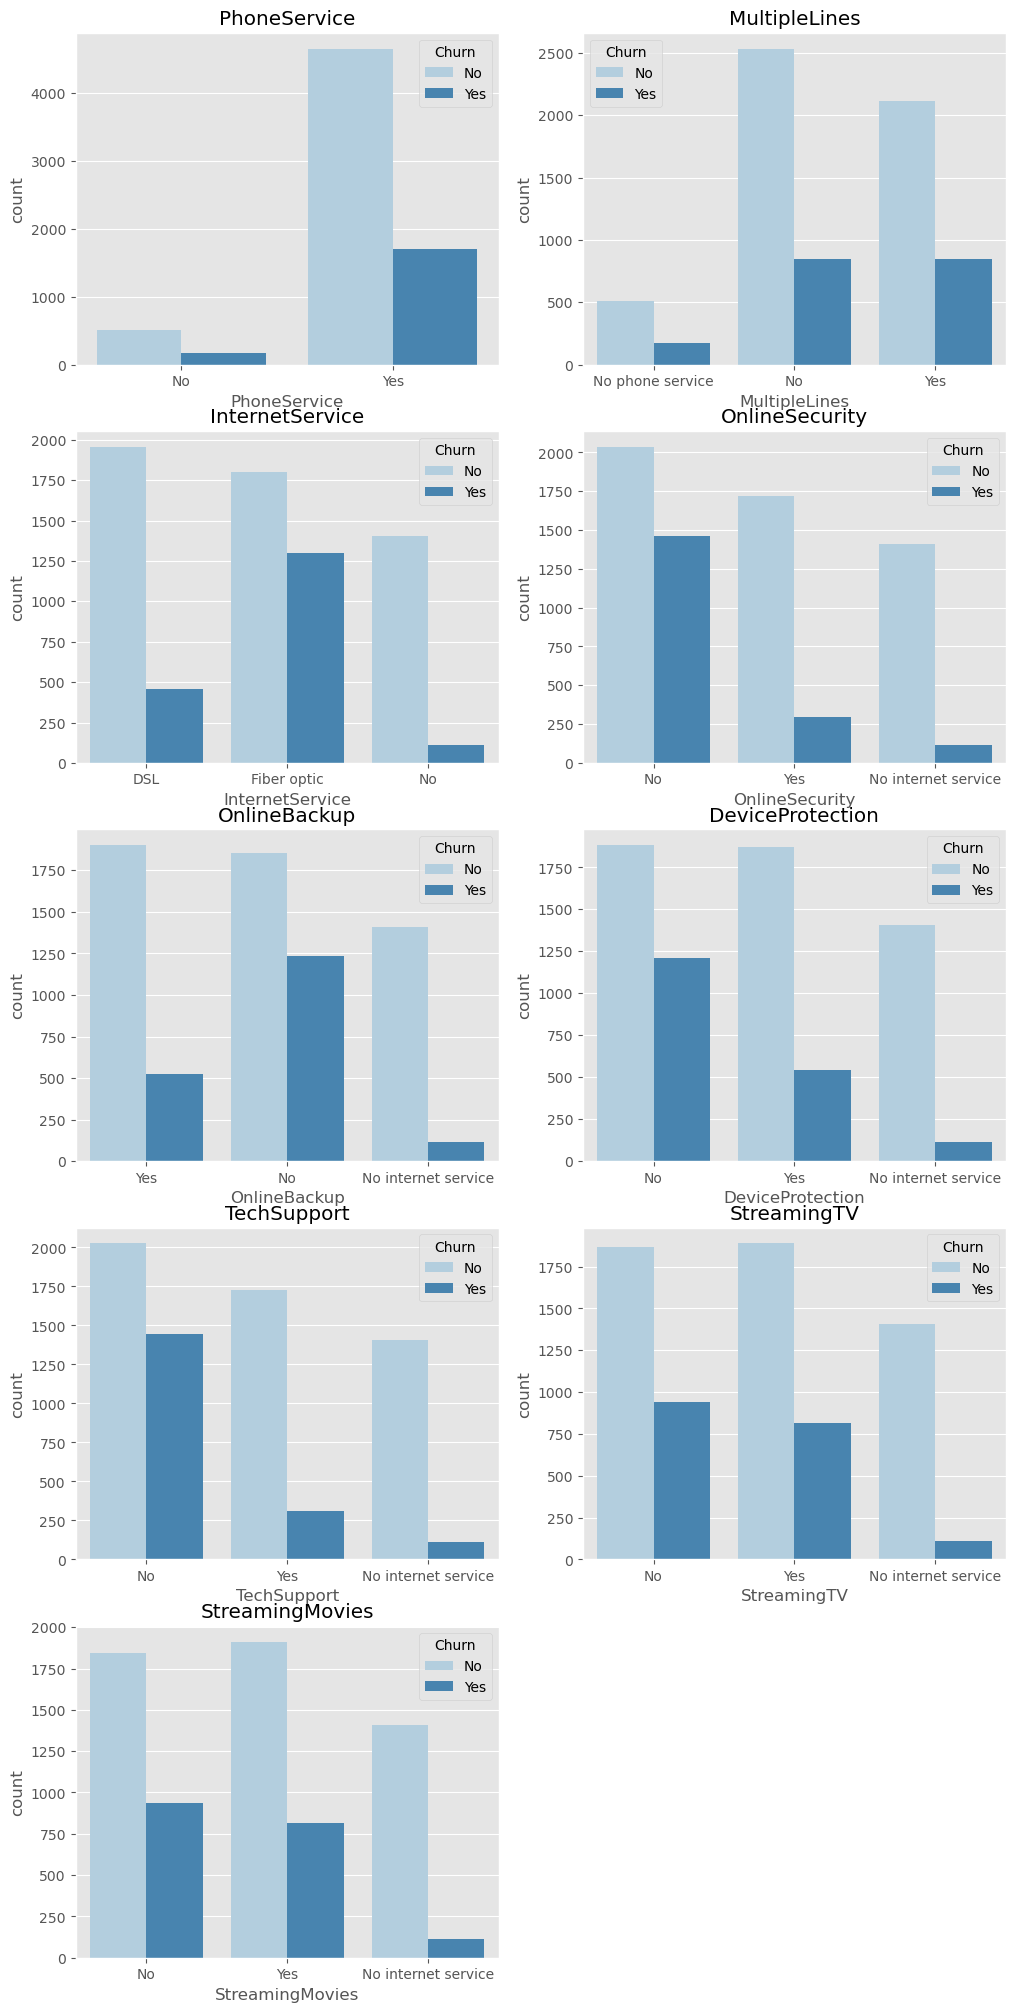

In [19]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services,"Churn")

The following conclusions by evaluating service attributes
- The moderately higher churn rate for customers who has the phone service.
- Customers with internet service fiber optic have a higher churn rate compared with DSL and No.
- The much higher churn rate for customers without online security.
- Customers who don’t have access to tech support tend to leave more frequently than those who do.
- Customers without online backup and device protection have a higher churn rate.                               

#### Analysis Customer Account Information — Categorical Variables
We will evaluate the percentage of churn for each customer account information (Contract, PaperlessBilling, PaymentMethod)

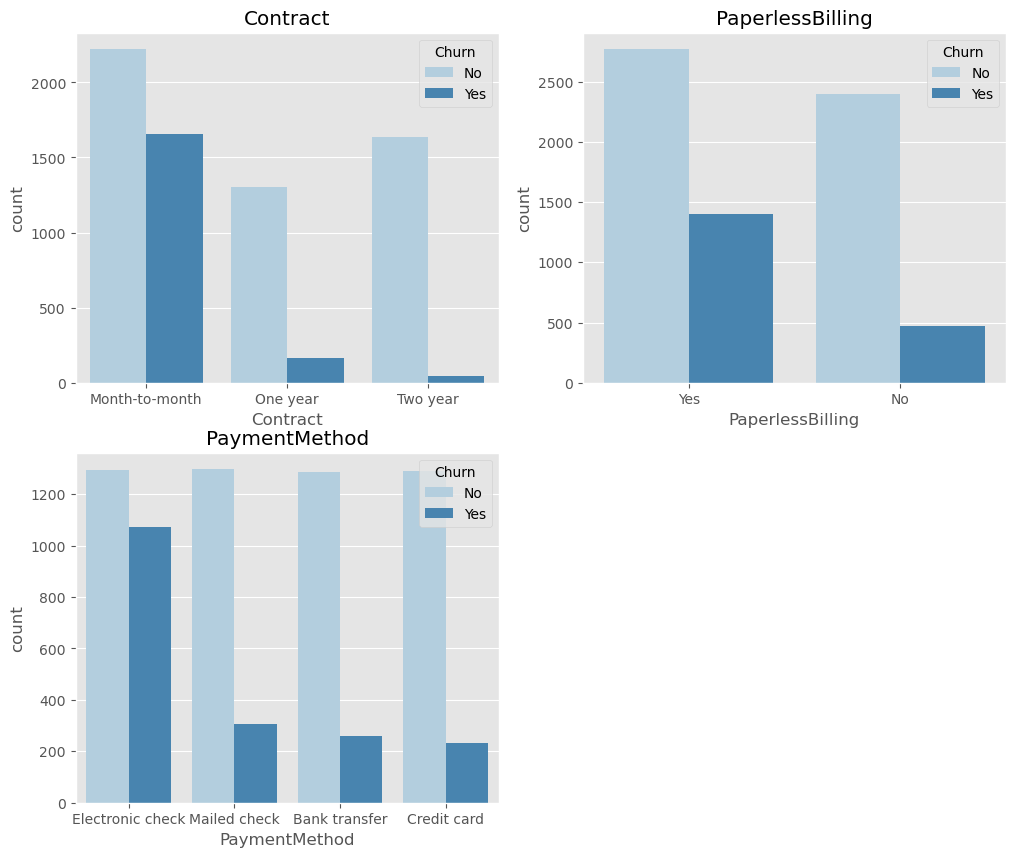

In [20]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

The following bar plot shown above can make conclusions from that:
- Customers are more likely to churn with month-to-month contracts.
- Moderately higher churn rate with electronic check payment method.
- Customers with paperless billing have higher churn rates.

#### Analysis Customer Account Information — Numerical Variables
We will evaluate the percentage of churn for each customer account information (tenure, MonthlyCharges, TotalCharges)

In [28]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

C:\Users\RITHIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RITHIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RITHIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RITHIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

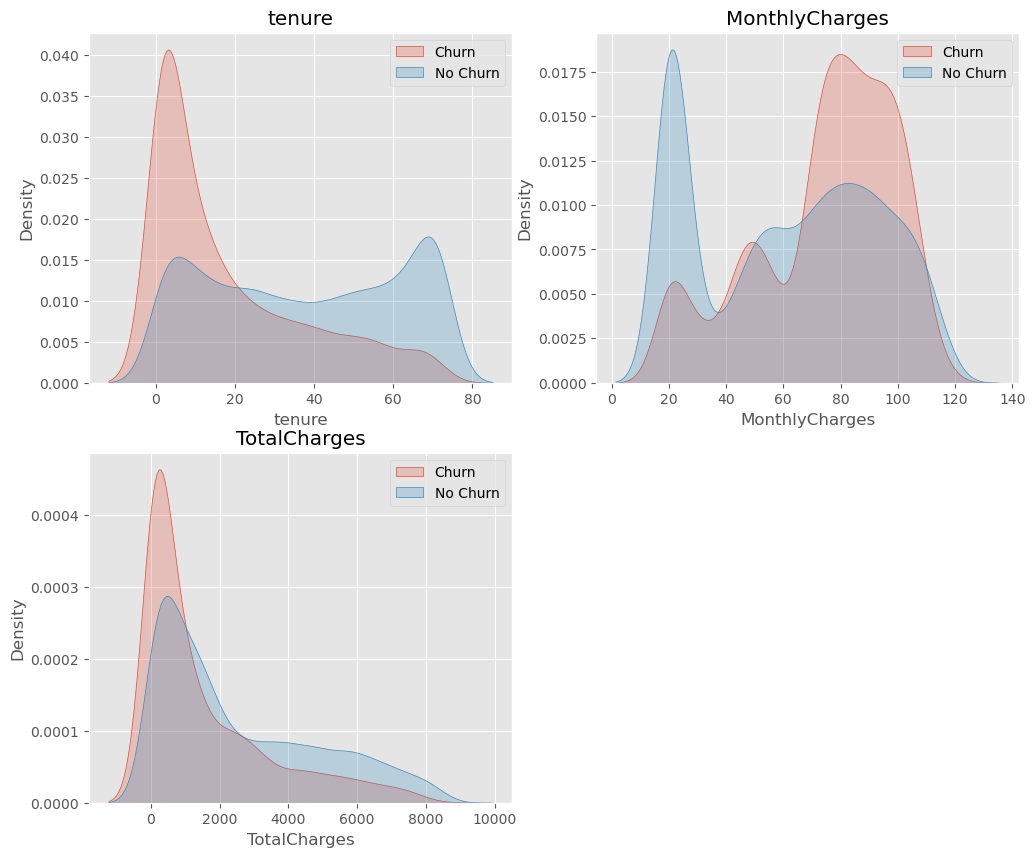

In [29]:
cutomer_account_num = ["tenure","MonthlyCharges","TotalCharges"]
histogram_plots(df,cutomer_account_num,"Churn")

The following histograms above we can get conclusions that:
- Customers with short tenure are more churn.
- Customers with paid more on monthly charges have higher churn rates.
- Customers with high total charges tend to churn.

#### Analysis of Customer's Demographic Info
We will evaluate the percentage of churn rate from the customer is demographic info (gender, SeniorCitizen, Partner, Dependents)



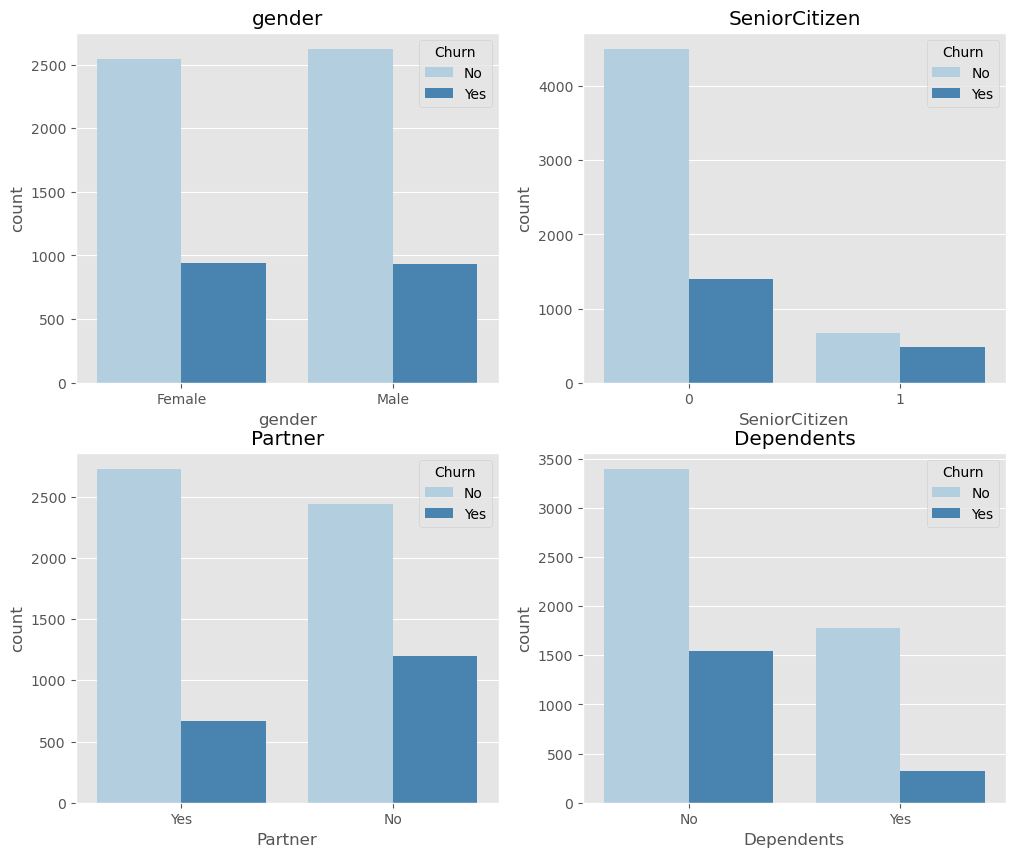

In [30]:
customer_demographic_info = ["gender","SeniorCitizen","Partner","Dependents"]
plot_categorical_to_target(df,customer_demographic_info,"Churn")

The following bar plot above we can draw some conclusions:
- Churn and no churn no have differences for each gender.
- Young customers are more likely to churn rather than old customers.
- Customers with a partner are less than churn if compared with a partner.

#### Outlier checking with boxplot for Numerical Variables
Outlier is an observation data set with significantly differs from others' observations of the data set. Outliers can make machine learning models with low accuracy so it is important to check them. We will check outliers from each numerical variable such as tenure, MonthlyCharges, and TotalCharges.

In [31]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.boxplot(x=column, data=df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outlier_check.png",dpi=300)
    return plt.show()

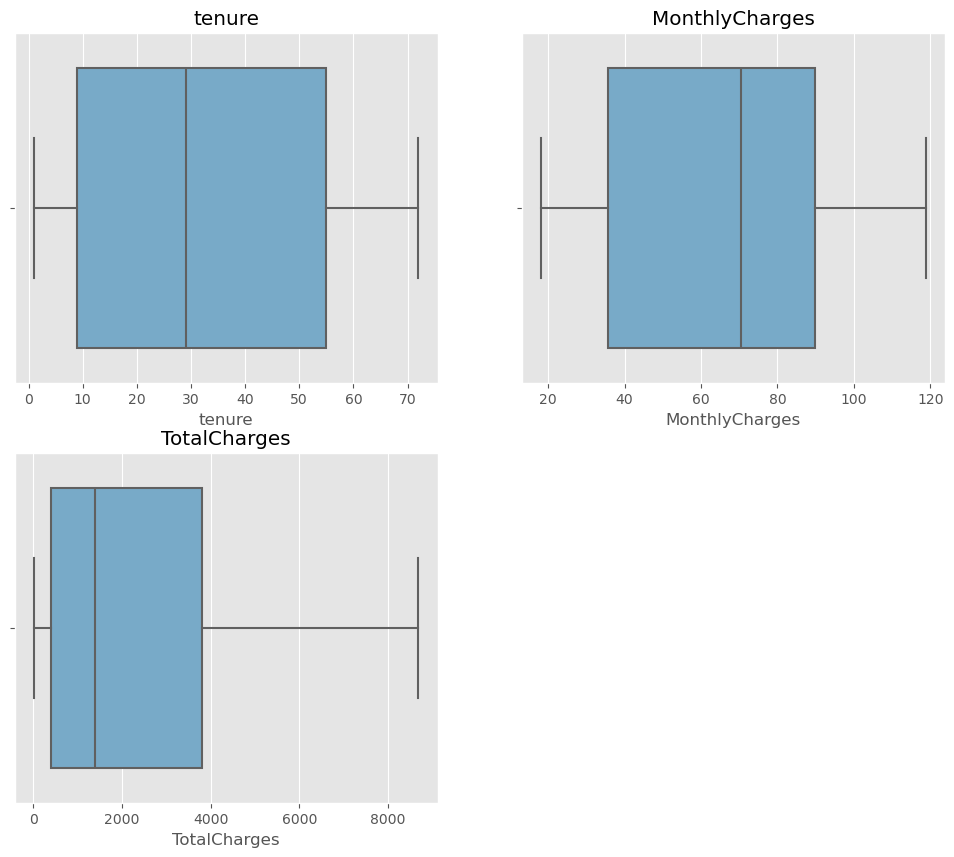

In [32]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

From boxplots, we can take a conclusion that each numerical variable doesn’t have an outlier.

# Feature Engineering 
Raw data can be transformed into features that are suitable for machine learning models that process called feature engineering. The aim of feature engineering is to make a machine learning model for better learning and get more accuracy. we will label encoding for categorical variables that have two values, one hot encoding for categorical variables that have more than two values, and feature calling for numerical variables.

# Label Encoding
Label encoding aims to convert categorical variables to numerical format. we will change categorical variables that have two values such as (Partner, Dependents, PhoneService, Churn, PaperlessBilling, and gender). Values of them just have Yes or No and we will change to 1 and 0 except gender is Female to 1 and Male to 0.

In [33]:
feature_le = ["Partner","Dependents","PhoneService","Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1,"No":0})
    return df
df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1,"Male":0})

In [34]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card,103.20,7362.90,0
4801-JZAZL,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0


# One Hot Encoding
Same with label encoding, one hot encoding also changes categorical variables to numerical variables. But, one hot encoding takes more than two values. One hot encoding creates a new binary integer (1 or 0) column for each level of the categorical variable. Categorical variables that have more than two values are (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod).

In [35]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df,columns = features_ohe)

In [39]:
df_ohe

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0,1,1,24,1,1,84.80,1990.50,0,...,False,False,True,False,True,False,False,False,False,True
2234-XADUH,1,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,False,False,True,False,False
4801-JZAZL,1,0,1,1,11,0,1,29.60,346.45,0,...,True,False,False,True,False,False,False,False,True,False


# feature Scaling
we use MinMaxScaler for feature scaling. MinMaxScaler can make numerical variables scaled from the range 0 to 1. Feature scaling is important to interpret machine learning models to have features on the same scale. We will be scaling numerical variables such as MonthlyCharges, TotalCharges, and tenure.

In [40]:
feature_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=feature_mms)

In [41]:
df_mms

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.50
3668-QPYBK,2,53.85,108.15
7795-CFOCW,45,42.30,1840.75
9237-HQITU,2,70.70,151.65
...,...,...,...
6840-RESVB,24,84.80,1990.50
2234-XADUH,72,103.20,7362.90
4801-JZAZL,11,29.60,346.45


In [42]:
df_remaining = df_ohe.drop(columns=feature_mms)

In [43]:
df_remaining

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,0,1,0,False,True,False,...,True,False,False,True,False,False,False,False,True,False
5575-GNVDE,0,0,0,0,1,0,0,True,False,False,...,True,False,False,False,True,False,False,False,False,True
3668-QPYBK,0,0,0,0,1,1,1,True,False,False,...,True,False,False,True,False,False,False,False,False,True
7795-CFOCW,0,0,0,0,0,0,0,False,True,False,...,True,False,False,False,True,False,True,False,False,False
9237-HQITU,1,0,0,0,1,1,1,True,False,False,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0,1,1,1,1,0,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2234-XADUH,1,0,1,1,1,1,0,False,False,True,...,False,False,True,False,True,False,False,True,False,False
4801-JZAZL,1,0,1,1,0,1,0,False,True,False,...,True,False,False,True,False,False,False,False,True,False


In [44]:
mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

In [45]:
rescaled_feature

array([[0.        , 0.11542289, 0.0012751 ],
       [0.46478873, 0.38507463, 0.21586661],
       [0.01408451, 0.35422886, 0.01031041],
       ...,
       [0.14084507, 0.11293532, 0.03780868],
       [0.04225352, 0.55870647, 0.03321025],
       [0.91549296, 0.86965174, 0.78764136]])

In [46]:
rescaled_feature_df = pd.DataFrame(rescaled_feature,columns=feature_mms,index=df_remaining.index)

In [47]:
rescaled_feature_df

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,0.000000,0.115423,0.001275
5575-GNVDE,0.464789,0.385075,0.215867
3668-QPYBK,0.014085,0.354229,0.010310
7795-CFOCW,0.619718,0.239303,0.210241
9237-HQITU,0.014085,0.521891,0.015330
...,...,...,...
6840-RESVB,0.323944,0.662189,0.227521
2234-XADUH,1.000000,0.845274,0.847461
4801-JZAZL,0.140845,0.112935,0.037809


In [48]:
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

In [49]:
df

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.000000,0.115423,0.001275,1,0,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
5575-GNVDE,0.464789,0.385075,0.215867,0,0,0,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
3668-QPYBK,0.014085,0.354229,0.010310,0,0,0,0,1,1,1,...,True,False,False,True,False,False,False,False,False,True
7795-CFOCW,0.619718,0.239303,0.210241,0,0,0,0,0,0,0,...,True,False,False,False,True,False,True,False,False,False
9237-HQITU,0.014085,0.521891,0.015330,1,0,0,0,1,1,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0.323944,0.662189,0.227521,0,0,1,1,1,1,0,...,False,False,True,False,True,False,False,False,False,True
2234-XADUH,1.000000,0.845274,0.847461,1,0,1,1,1,1,0,...,False,False,True,False,True,False,False,True,False,False
4801-JZAZL,0.140845,0.112935,0.037809,1,0,1,1,0,1,0,...,True,False,False,True,False,False,False,False,True,False


# Correlation Analysis

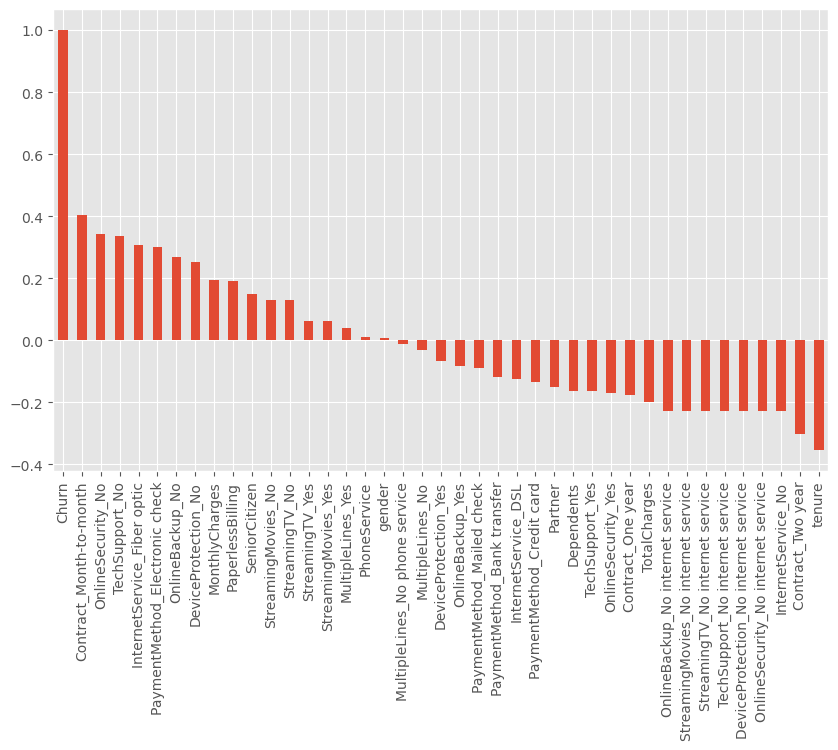

In [50]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("Correlation.png",dpi=300)
plt.show()

Correlation is a statistical method for testing the relationship between numerical or categorical variables. The following plot above is to know the correlation between some variables to target variable churn. The highest correlation is the Contract_Month-to-month variable so that variable is so related to churn rate. Tenure is had a negative correlation with churn so higher values from tenure make a lower churn.

# Train Test Split
Train test split is a process to validate the data set and simulate how the model performs with new data. Here, we create 80% of train data and 20% of testing data. The “Churn” column we rename (the “y”) and the features column we rename (the “X”).

In [51]:
x = df.drop(columns = "Churn")
y = df.Churn

In [52]:
x

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.000000,0.115423,0.001275,1,0,1,0,0,1,False,...,True,False,False,True,False,False,False,False,True,False
5575-GNVDE,0.464789,0.385075,0.215867,0,0,0,0,1,0,True,...,True,False,False,False,True,False,False,False,False,True
3668-QPYBK,0.014085,0.354229,0.010310,0,0,0,0,1,1,True,...,True,False,False,True,False,False,False,False,False,True
7795-CFOCW,0.619718,0.239303,0.210241,0,0,0,0,0,0,False,...,True,False,False,False,True,False,True,False,False,False
9237-HQITU,0.014085,0.521891,0.015330,1,0,0,0,1,1,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0.323944,0.662189,0.227521,0,0,1,1,1,1,False,...,False,False,True,False,True,False,False,False,False,True
2234-XADUH,1.000000,0.845274,0.847461,1,0,1,1,1,1,False,...,False,False,True,False,True,False,False,True,False,False
4801-JZAZL,0.140845,0.112935,0.037809,1,0,1,1,0,1,False,...,True,False,False,True,False,False,False,False,True,False


In [53]:
y

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: Churn, Length: 7032, dtype: int64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5625, 40), (1407, 40), (5625,), (1407,))

# Model Selection and Evaluation Model
## Model Selection
We use Two models for churn classification, model that we use is:
- K-Nearest Neighbors — quick, easy, and instance-based
- Logistic Regression
  

## Metric Evaluation
For evaluating the model we use some metrics evaluation such as:
- Feature Weights — List the top weight of the features to make a prediction. Feature weights are used for the logistic regression model
-  Confusion Matrix — Show the true and false then compare to prediction and actual values.
-  Accuracy Score — Show the accuracy model from training and testing to measure that a model is suitable for prediction.
-  ROC Curve — Show the curve of True Positive Rate (TPR) against False Positive Rate (FPR) for different thresholds and the ROC curve is used for the diagnostic machine learning model.
-  AUC (for ROC) — Area Under Curve (AUC) is used to calculate the area of the ROC Curve and increasing area is better for the model.
-  Precision-Recall-Curve — Show the curve to compare the False Positive Rate (FPR) and False Negative Rate (FNR) for different thresholds and this metric is used to demonstrate the diagnostic model capability. This metric is suitable for imbalanced target data sets due to the focus on precision and recall and not dependent on the number of true negatives.
-  F1 Score — This metric is usually better for accuracy, especially if it has an imbalanced data set target distribution.
-  AUC (for PRC) — Measure the overall area under the curve of PRC.

### Creates Function For Displaying Evaluation Metrics

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)
y_pred_logreg = logreg.predict(x_test)
y_pred_logre_proba = logreg.predict_proba(x_test)

In [59]:
# For Logistic regression
def feature_weights(x_df,classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = x_df.columns.values).sort_values(ascending=False)

    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")

    Bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    Bottom_10_weights.plot(kind="bar")

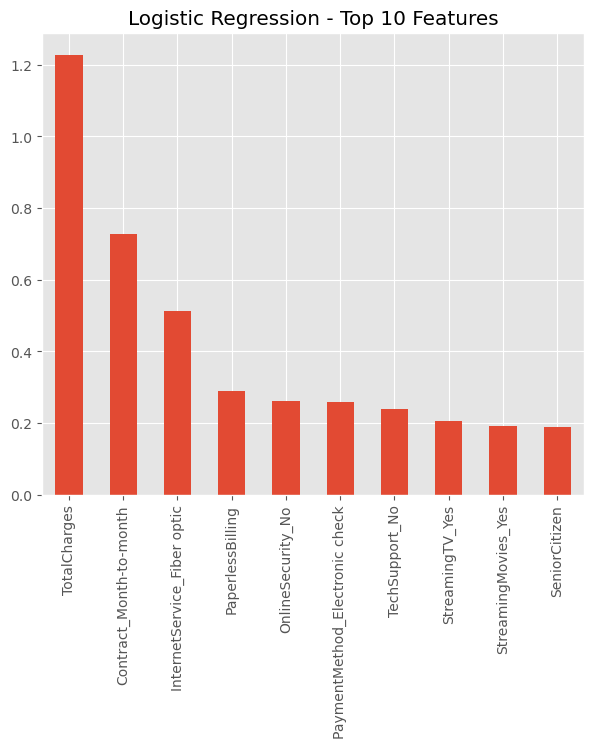

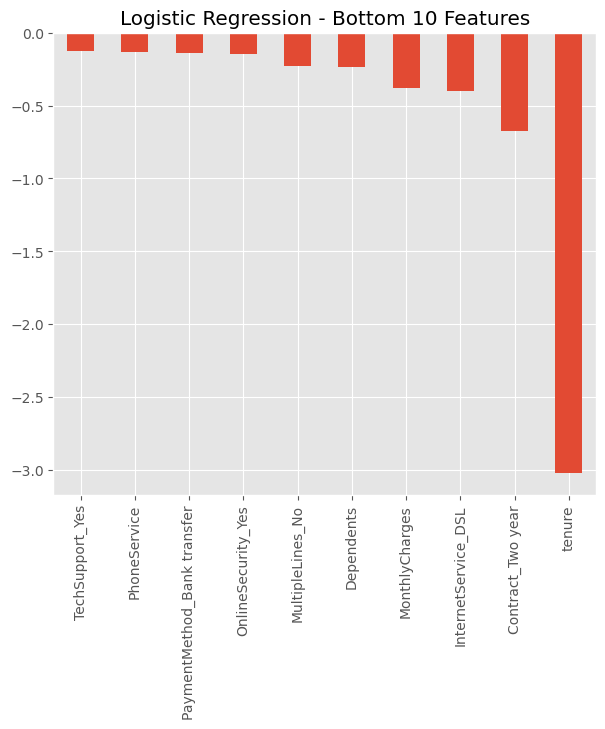

In [60]:
feature_weights(x_train,logreg,"Logistic Regression")

In [65]:
def confusion_matrix_plot(x_train,x_test,y_train,y_test,y_pred,classifier,classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["NO Churn","Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()

    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(x_train,y_train)}")
    return print("\n")

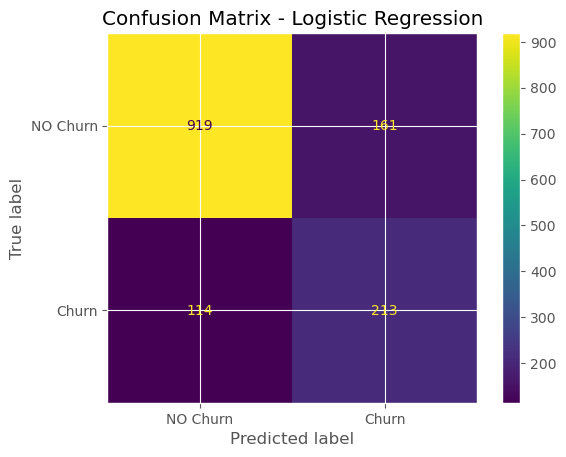

Accuracy Score Test = 0.8045486851457001
Accuracy Score Train = 0.8048




In [66]:
confusion_matrix_plot(x_train,x_test,y_train,y_test,y_pred_logreg,logreg,"Logistic Regression")

In [72]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

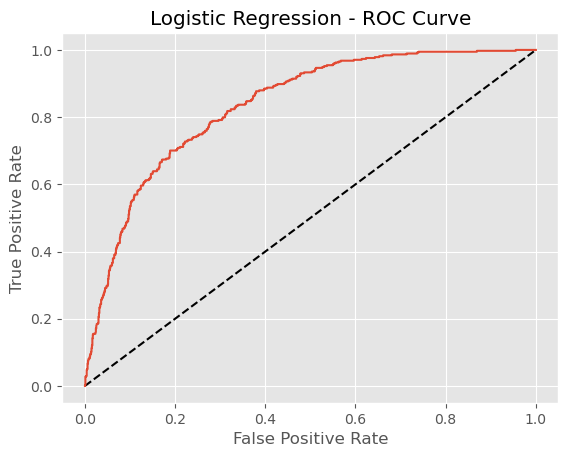

AUC Score (ROC):0.834748745929772


In [73]:
roc_curve_auc_score(x_test,y_test, y_pred_logre_proba, "Logistic Regression")

In [79]:
def precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)
    plt.plot(recall, precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 score:{f1_score_result} \n AUC Score (PR): {auc_score}")

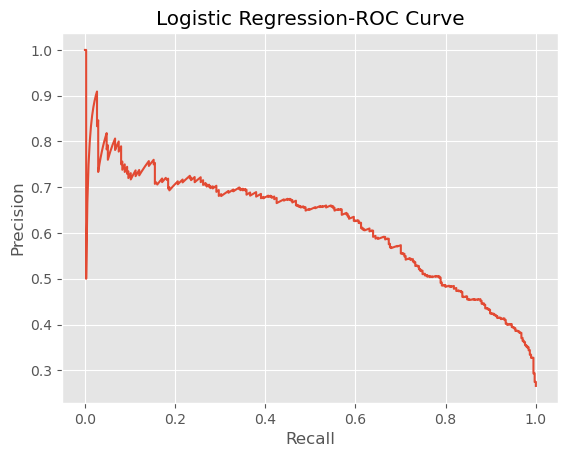

f1 score:0.6077032810271041 
 AUC Score (PR): 0.6185957002131842


In [80]:
precision_recall_curve_and_scores(x_test,y_test,y_pred_logreg,y_pred_logre_proba,"Logistic Regression")

# K Nearest Neighbour

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn_proba = knn.predict_proba(x_test)

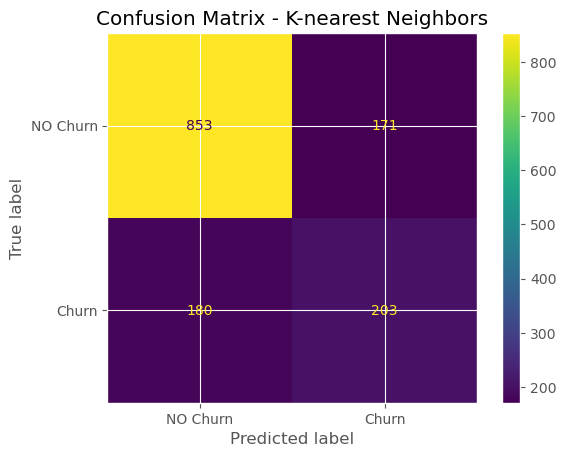

Accuracy Score Test = 0.7505330490405118
Accuracy Score Train = 0.8359111111111112




In [88]:
confusion_matrix_plot(x_train,x_test,y_train,y_test,y_pred_knn,knn,"K-nearest Neighbors")

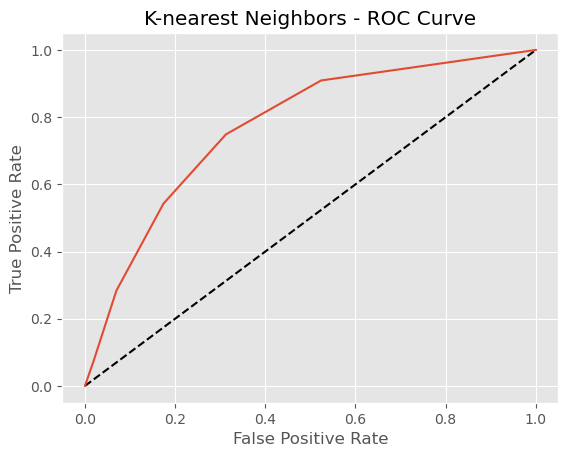

AUC Score (ROC):0.7718769898173121


In [89]:
roc_curve_auc_score(x_test,y_test,y_pred_knn_proba,"K-nearest Neighbors")

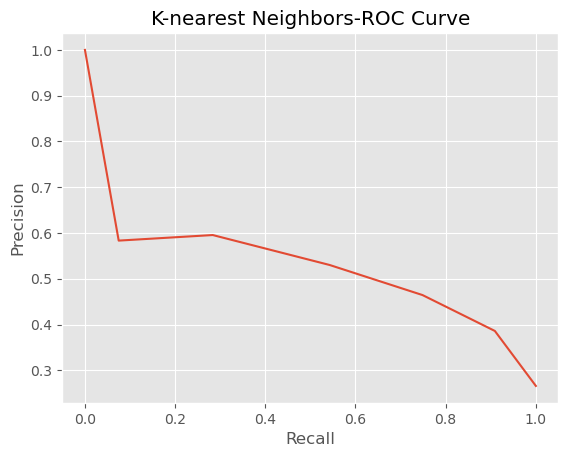

f1 score:0.5363276089828268 
 AUC Score (PR): 0.5283439083015596


In [93]:
precision_recall_curve_and_scores(x_test,y_test,y_pred_knn,y_pred_knn_proba,"K-nearest Neighbors")